In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mistune.plugins.formatting import insert

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [166]:
import causalml

In [167]:
import numpy as np

In [168]:
np.version.version

'1.26.4'

In [169]:
bd = pd.read_csv('train.csv')

In [170]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
bd["cc_4_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_4"]])

In [171]:
ord_enc = OrdinalEncoder()
bd["cc_2_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_2"]])

In [172]:
ord_enc = OrdinalEncoder()
bd["cc_6_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_6"]])

In [173]:
bd['retro_date'] = pd.to_datetime(bd['retro_date'])

In [174]:
df = bd.drop(['cc_2', 'cc_4', 'cc_6'], axis=1)

In [175]:
test = pd.read_csv('test.csv')

In [176]:
ord_enc = OrdinalEncoder()
test["cc_4_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_4"]])
ord_enc = OrdinalEncoder()
test["cc_2_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_2"]])
ord_enc = OrdinalEncoder()
test["cc_6_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_6"]])
test.drop('retro_date', axis=1, inplace=True)
test.drop('cc_2', axis=1, inplace=True)
test.drop('cc_4', axis=1, inplace=True)
test.drop('cc_6', axis=1, inplace=True)

In [177]:
X_train = df.drop(columns = 'successful_utilization', axis=1)
y_train = df.successful_utilization
X_test = test

In [178]:
X_train.drop('retro_date', axis=1, inplace=True)

In [179]:
X = X_train

In [180]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Заполняем пропуски временно средними значениями для работы K-means
df_filled = X.fillna(X.mean())

# Стандартизация данных (нормализация)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Применяем KMeans с заданным числом кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Добавляем колонки с кластерами в DataFrame
X['Cluster'] = clusters

# Заполнение пропусков по кластерам
for column in X.columns[:-1]:  # Пропускаем столбец с кластерами
    for cluster in range(kmeans.n_clusters):
        # Вычисляем среднее значение признака в пределах кластера
        cluster_mean = X[X['Cluster'] == cluster][column].mean()
        
        # Заполняем пропуски средним значением кластера
        X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean

# Удаляем временный столбец с кластерами
X.drop(columns=['Cluster'], inplace=True)

/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/2726911761.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16471183866340394' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/2726911761.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '86.79731668213653' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/2726911761.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pan

In [181]:
X['Treatment'] = X['treatment']
X.drop('treatment', axis=1, inplace=True)
X['treatment'] = X['Treatment'].rename('treatment')
X.drop('Treatment', axis=1, inplace=True)

In [182]:
# Заполняем пропуски временно средними значениями для работы K-means
df_filled = test.fillna(test.mean())

# Стандартизация данных (нормализация)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Применяем KMeans с заданным числом кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Добавляем колонки с кластерами в DataFrame
test['Cluster'] = clusters

# Заполнение пропусков по кластерам
for column in test.columns[:-1]:  # Пропускаем столбец с кластерами
    for cluster in range(kmeans.n_clusters):
        # Вычисляем среднее значение признака в пределах кластера
        cluster_mean = test[test['Cluster'] == cluster][column].mean()
        
        # Заполняем пропуски средним значением кластера
        test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean

# Удаляем временный столбец с кластерами
test.drop(columns=['Cluster'], inplace=True)

/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05265125220270198' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '602.9572275324398' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a fut

In [183]:
corr_matrix = X.corr()  # Матрица корреляций
high_corr = corr_matrix.abs() > 0.6  # Признаки с корреляцией выше 0.8

# Получим верхний треугольник матрицы корреляций
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Найдём признаки с высокой корреляцией
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.6)]

# Удалим коррелированные признаки
df_reduced = X.drop(to_drop, axis=1)

In [184]:
RANDOM_STATE = 42
model = LogisticRegression(random_state=RANDOM_STATE)
model.fit(df_reduced, y_train) # мой фит


/Users/ssd/Documents/src/spb2024/allcup/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [185]:
# Предположим, df1 и df2 — два DataFrame
# Получаем пересечение имен столбцов
common_columns = df_reduced.columns.intersection(test.columns)

# Оставляем только эти столбцы в df1
test_filtered = test[common_columns]

In [186]:
X_test_0 = test_filtered.copy()
X_test_0['treatment'] = 0
y_pred_0 = model.predict_proba(X_test_0)[:,1]

In [187]:
X_test_1 = test_filtered.copy()
X_test_1['treatment'] = 1
y_pred_1 = model.predict_proba(X_test_1)[:,1]

In [188]:
uplift = y_pred_1 - y_pred_0

In [189]:
CsvUplift = pd.DataFrame({'successful_utilization' : uplift})

In [190]:
CsvUplift

,successful_utilization
0,-2.228495e-12
1,-1.362410e-12
2,-4.105952e-13
3,-2.163103e-12
4,-2.006117e-12
...,...
74308,-1.962985e-12
74309,-1.901590e-12
74310,-2.213729e-12
74311,-2.150169e-12


In [76]:
import scipy.stats as stats

In [ ]:
CsvUplift.to_csv('/Users/ssd/Downloads/uplift4.csv')

In [83]:
res = 0
for i in X_pca.columns:
    for j in X_pca.columns:
        r, p_value = stats.pearsonr(X_pca[i], X_pca[j])
        alpha = 0.05
        if p_value < alpha and i != j and abs(r) >= 0.6:
            print(i, "     ", j, "     ", r, "     ", p_value)
            res += 1
print(res)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Стандартизация данных (PCA чувствителен к масштабу признаков)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Применение PCA
pca = PCA(n_components=0.95)  # Сохраним 95% информации
X_pca = pca.fit_transform(X_scaled)

In [87]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X, y_train)

/Users/ssd/Documents/src/spb2024/allcup/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.642e+04, tolerance: 5.424e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [58]:
X_test_0.columns == X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 2. Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# 3. Обучение модели Lasso
model = Lasso(alpha=0.1)
model.fit(X_train_scaled, y_train)

# 4. Предсказание на тестовой выборке
y_pred = model.predict(X_test_0)

/Users/ssd/Documents/src/spb2024/allcup/venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [120]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Стандартизация данных (PCA чувствителен к масштабу признаков)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=0.95)  # Сохраним 95% информации
X_pca = pca.fit_transform(X_scaled)


In [126]:
# Стандартизация данных (PCA чувствителен к масштабу признаков)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test)

# Применение PCA
pca = PCA(n_components=0.95)  # Сохраним 95% информации
X_test_pca = pca.fit_transform(X_scaled)

NameError: name 'uplift_pd' is not defined

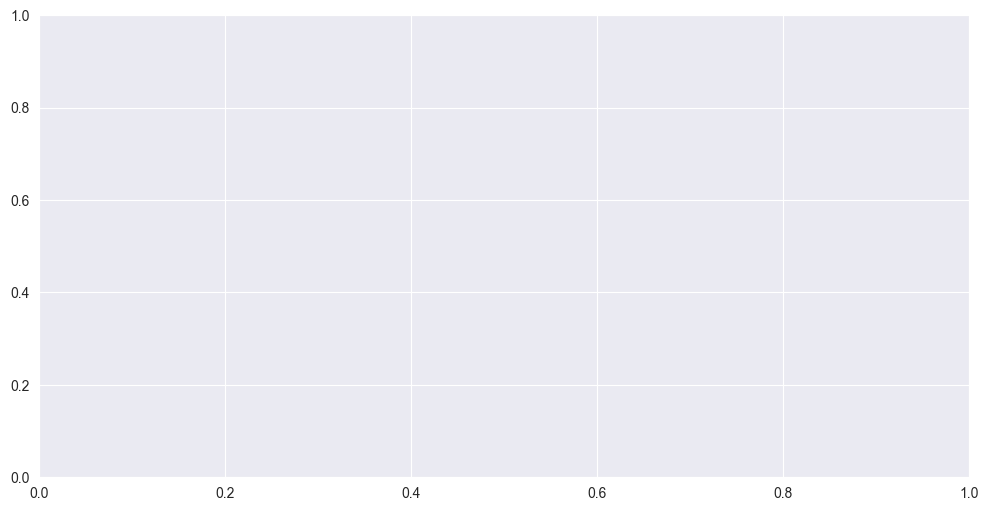

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data = uplift_pd, x=uplift).set_title('uplift')
plt.show()

In [117]:
uplift

array([-2.14300799e-13, -4.46143122e-13, -3.91298105e-13, ...,
       -3.53661544e-13, -1.99618100e-13, -4.54913884e-13])

In [66]:
CsvUplift.to_csv('/Users/ssd/Downloads/uplift4.csv')

In [105]:
CsvUplift

,successful_utilization
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
74308,0.0
74309,0.0
74310,0.0
74311,0.0
